In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from models.settings import *

# Infering added variance

In [2]:
os.listdir('data')

['train', 'test', 'validation']

In [3]:
classes = os.listdir('data/train')
classes

['a03', 'a06', 'a05', 'a02', 'a01', 'a04']

In [110]:
n_features = 9
n_classes = 6
n_rows = 5

In [5]:
ts = pd.read_csv('data/train/a01/554.csv', index_col=0)
ts.shape

(5, 9)

In [6]:
std_train = np.zeros((n_classes, n_features))
mean_train = np.zeros((n_classes, n_features))

In [12]:
i = 0
for cl in sorted(classes):
    j = 0
    files = os.listdir('data/train/' + cl)
    for f in tqdm(files):
        ts = pd.read_csv('data/train/{}/{}'.format(cl, f), index_col=0)
        ts = ts.as_matrix()
        std_train[i, :] += ts.std(axis = 0)
        mean_train[i, :] += ts.mean(axis = 0)
        j += 1
    std_train[i, :] /= len(files)
    mean_train[i, :] /= len(files)
    i += 1

100%|██████████| 219/219 [00:00<00:00, 301.59it/s]


In [9]:
files = os.listdir('data/test/')
std_test = np.zeros((n_features))
mean_test = np.zeros((n_features))
j = 0
for f in tqdm(files):
    fn = 'data/test/' + f
    ts = pd.read_csv(fn, index_col=0)
    ts = ts.as_matrix()
    std_test += ts.std(axis = 0)
    mean_test += ts.mean(axis = 0)
    j += 1
std_test /= len(files)
mean_test /= len(files)

100%|██████████| 3481/3481 [00:11<00:00, 305.40it/s]


array([ 0.0436496 ,  0.01936683,  0.03176261,  0.10810825,  0.08290869,
        0.07745803,  0.01285374,  0.01611783,  0.01865271])

In [63]:
std_ = (std_test ** 2 - std_train.mean(axis = 0) ** 2) ** 0.5
std_

array([ 0.1537193 ,  0.10534117,  0.13476192,  0.21365059,  0.21538199,
        0.20373781,  0.07647217,  0.08767993,  0.09402546])

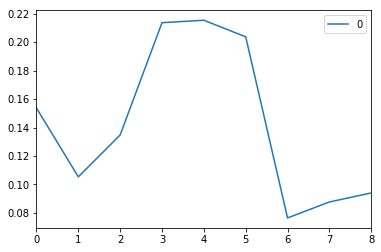

In [64]:
pd.DataFrame(std_).plot()

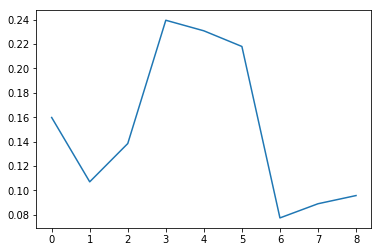

In [65]:
plt.plot(std_test)

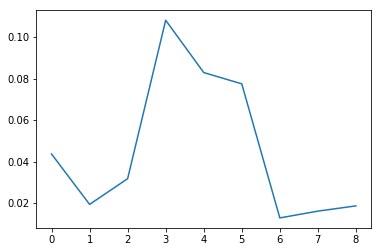

In [80]:
plt.plot(std_train.mean(axis=0))

In [41]:
np.mean(std_)

0.14275225901167513

In [58]:
mean_test

array([ 0.54730506, -0.03507497, -0.21389331, -0.0534943 , -0.15063397,
        0.17055078,  1.32656069,  0.02284111,  0.18943318])

In [61]:
mean_train.mean(axis = 0)

array([ 0.28875103, -0.01887428, -0.11543318, -0.0330825 , -0.08216371,
        0.0922319 ,  0.73523845, -0.012822  ,  0.07660774])

# Augmenting datasets with noise

In [118]:
std_

array([ 0.1537193 ,  0.10534117,  0.13476192,  0.21365059,  0.21538199,
        0.20373781,  0.07647217,  0.08767993,  0.09402546])

In [119]:
noise_pattern = [0.05, 0.05, 0.05, 0.08, 0.08, 0.08, 0.02, 0.02, 0.02]
noise_pattern = np.reshape(np.tile(noise_pattern, n_rows), (n_rows, n_features))

In [156]:
def add_noise_and_save(filename, idx):
    ts = pd.read_csv(test_fn, index_col=0)
    shape = ts.as_matrix().shape
    rnorm = np.random.normal(loc = 0, scale = noise_pattern)
    out_fn = filename[:-4] + '_noise_' + str(idx) + '.csv'
    (ts + rnorm).to_csv(out_fn, sep = ',')

In [159]:
n_augment = 4
input_dir = VALIDATION_DATA_DIR
for activity in ACTIVITIES_LIST:
    for _, _, filenames in os.walk(input_dir+activity+"/"):
        for filename in tqdm(filenames):
            for i in range(n_augment):
                fn = input_dir+activity+"/"+filename
                add_noise_and_save(fn, i)

 67%|██████▋   | 287/431 [00:05<00:02, 50.98it/s]

KeyboardInterrupt: 

 67%|██████▋   | 287/431 [00:22<00:11, 12.70it/s]

# Move all data to train